In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

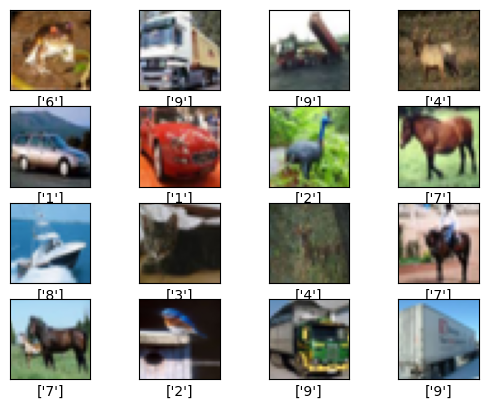

In [3]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i].astype(str))

plt.show()

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 19s 11ms/step - loss: 2.0728 - accuracy: 0.2197
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9791 - accuracy: 0.2564
Epoch 3/5
1563/1563 [==============================] - 18s 11ms/step - loss: 1.9656 - accuracy: 0.2613
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.9530 - accuracy: 0.2672
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.9426 - accuracy: 0.2733


In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.8805 - accuracy: 0.3067


[1.8805427551269531, 0.3066999912261963]

What happened in the Flatten layer?

In [6]:
gavazn = x_train[3]
gavazn = gavazn.flatten()
gavazn = gavazn.reshape(-1, 1)
gavazn.shape

(3072, 1)

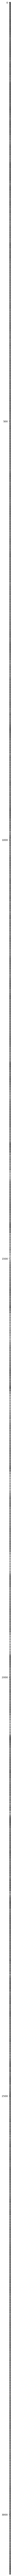

In [7]:
plt.figure(figsize=(200, 200))
plt.imshow(gavazn, cmap='gray')
plt.xticks([], [])
plt.show()
# plt.savefig("gavazn.png")